<a href="https://colab.research.google.com/github/Tony-Y/oqmd-v1.2-dataset-for-cgnn/blob/main/CGNN_oqmd_fe_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/Tony-Y/cgnn.git
!CGNN_HOME=`pwd`/cgnn

Cloning into 'cgnn'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 161 (delta 8), reused 9 (delta 3), pack-reused 136
Receiving objects: 100% (161/161), 1.76 MiB | 21.17 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [4]:
!wget -q "https://drive.google.com/uc?export=download&id=1I6nS4l15SeX5S4VcU3jKG5Iqvomj7eXB" -O oqmd.7z

In [5]:
!7z e oqmd.7z -ocgnn/OQMD *.npz *.json *.csv -r


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 74747342 bytes (72 MiB)

Extracting archive: oqmd.7z
--
Path = oqmd.7z
Type = 7z
Physical Size = 74747342
Headers Size = 363
Method = LZMA2:24
Solid = +
Blocks = 4

  0%      5% - oqmd_dataset/targets.csv                                11% - oqmd_dataset/targets.csv                                18% - oqmd_dataset/targets.csv                                24% - oqmd_dataset/targets.csv                                30% - oqmd_dataset/targets.csv

In [6]:
!ls cgnn/OQMD/

config.json  graph_data.npz  oqmd.py  README.md  split.json  targets.csv


Let's train a benchmark model (oqmd_fe_benchmark). Here is the head of output:
```
Device: cuda

Model: {'n_node_feat': 89, 'n_hidden_feat': 96, 'n_graph_feat': 192, 'n_conv': 4, 'n_fc': 2, 'activation': 'softplus', 'use_batch_norm': True, 'node_activation': None, 'use_node_batch_norm': False, 'edge_activation': None, 'use_edge_batch_norm': False, 'n_edge_net_feat': 16, 'n_edge_net_layers': 0, 'edge_net_activation': 'elu', 'use_edge_net_batch_norm': False, 'use_fast_edge_network': False, 'fast_edge_network_type': 0, 'use_aggregated_edge_network': False, 'edge_net_cardinality': 32, 'edge_net_width': 4, 'use_edge_net_shortcut': False, 'n_postconv_net_layers': 0, 'postconv_net_activation': 'elu', 'use_postconv_net_batch_norm': False, 'conv_bias': False, 'edge_net_bias': False, 'postconv_net_bias': False, 'full_pooling': True, 'gated_pooling': True, 'conv_type': 0, 'use_extension': False}

Optimizer: {'optim': 'adam', 'lr': 0.001, 'weight_decay': 1e-06, 'clip_value': None}

Scheduler: {'milestones': [250], 'gamma': 0.1, 'cosine_annealing': False}

Dataset: {'dataset_path': '../../OQMD', 'target_name': 'formation_energy_per_atom', 'split_file': '../../OQMD/split.json'}

Dataloader: {'num_workers': 0, 'batch_size': 512}

Seed: 12345

test: 55732 train: 449867 val: 56289
Epoch 0/299
current lr: 0.001
train loss: 0.1751 mae: 0.2861
val loss: 0.0980 mae: 0.2069
Elapsed time (sec.): 28.128
```
You may ignore a `UserWarning` that appears at epoch 0.

In [7]:
!cd cgnn/examples/oqmd_fe_benchmark/; bash run_oqmd.sh

Device: cuda

Model: {'n_node_feat': 89, 'n_hidden_feat': 96, 'n_graph_feat': 192, 'n_conv': 4, 'n_fc': 2, 'activation': 'softplus', 'use_batch_norm': True, 'node_activation': None, 'use_node_batch_norm': False, 'edge_activation': None, 'use_edge_batch_norm': False, 'n_edge_net_feat': 16, 'n_edge_net_layers': 0, 'edge_net_activation': 'elu', 'use_edge_net_batch_norm': False, 'use_fast_edge_network': False, 'fast_edge_network_type': 0, 'use_aggregated_edge_network': False, 'edge_net_cardinality': 32, 'edge_net_width': 4, 'use_edge_net_shortcut': False, 'n_postconv_net_layers': 0, 'postconv_net_activation': 'elu', 'use_postconv_net_batch_norm': False, 'conv_bias': False, 'edge_net_bias': False, 'postconv_net_bias': False, 'full_pooling': True, 'gated_pooling': True, 'conv_type': 0, 'use_extension': False}

Optimizer: {'optim': 'adam', 'lr': 0.001, 'weight_decay': 1e-06, 'clip_value': None}

Scheduler: {'milestones': [250], 'gamma': 0.1, 'cosine_annealing': False}

Dataset: {'dataset_path

Here is the tail of output:
```
Epoch 299/299
current lr: 0.0001
train loss: 0.0036 mae: 0.0397
val loss: 0.0077 mae: 0.0429
Elapsed time (sec.): 24.972

Total elapsed time (sec.): 7782.083
The best val metric: 0.042318

test loss: 0.0077 mae: 0.0428

END
```

/content/cgnn/examples/oqmd_fe_benchmark


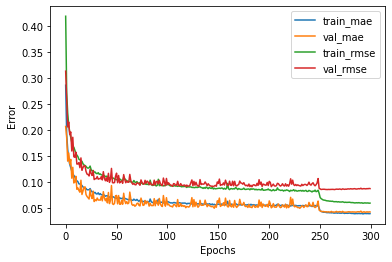

<Figure size 432x288 with 0 Axes>

In [10]:
%cd 'cgnn/examples/oqmd_fe_benchmark/'
%run '../../tools/plot_history.py'

RMSE: 0.08766037202170913
MAE: 0.042757668154176885
max_value 4.145389
min_value -4.444026


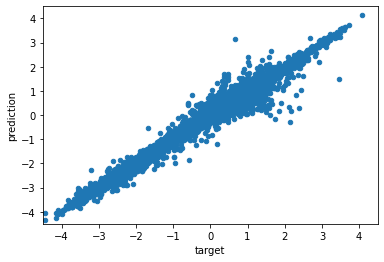

<Figure size 432x288 with 0 Axes>

In [12]:
%run '../../tools/plot_test.py'